<a href="https://colab.research.google.com/github/KillerStrike17/Deep-Learning-for-Vision-Using-Tensorflow-Keras/blob/master/6.%20Types-of-Convolutions/Usage_of_Border_Same%2C_1x1_and_removal_of_Dense_Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Loadinng all the required libraries
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
#Importing the database
from keras.datasets import cifar10
#splitting the database
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
#Storing the training dataset details in variables
num_train,  img_rows, img_cols,img_channels, =  train_features.shape
print("No of training dataset:- ",num_train)
print("No of rows:- ",img_rows)
print("No of columns:- ",img_cols)
print("No of channels:- ",img_channels)
#Storing the testing dataset details in variables
num_test, _, _, _ =  test_features.shape
#Stroing the total class of dataset in num_classes variable
num_classes = len(np.unique(train_labels))
print("Total Classes:- ", num_classes)

No of training dataset:-  50000
No of rows:-  32
No of columns:-  32
No of channels:-  3
Total Classes:-  10


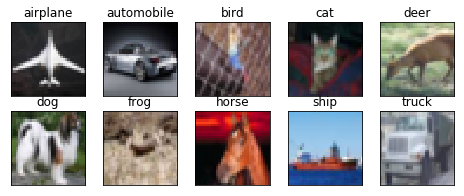

In [0]:
#class_names of the dataset
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
#loop to display a sample image of each channel
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
#function to plot graphs of accuracy and loss
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
#Function to calculate accuracy
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
#converting the pixel in range 0-1
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
#(receptive field,Output Channel) calculated using old method
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
#(3,32)
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
#(5,30)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#(10,15)
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
#(12,15)
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
#(14,13)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#(28,6)
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
#(30,6)
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
#(32,4)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#(64,2)
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


W0620 08:49:28.753683 140081771906944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
W0620 08:49:28.768396 140081771906944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0620 08:49:28.771109 140081771906944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':
W0620 08:49:29.219291 140081771906944 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and wil

Epoch 1/100
390/390 [==============================] - 12s 32ms/step - loss: 1.8594 - acc: 0.2890 - val_loss: 1.4564 - val_acc: 0.4600
Epoch 2/100
390/390 [==============================] - 9s 23ms/step - loss: 1.3508 - acc: 0.5093 - val_loss: 1.0968 - val_acc: 0.6031
Epoch 3/100
390/390 [==============================] - 9s 23ms/step - loss: 1.1162 - acc: 0.6031 - val_loss: 0.9643 - val_acc: 0.6533
Epoch 4/100
390/390 [==============================] - 9s 23ms/step - loss: 0.9699 - acc: 0.6609 - val_loss: 0.8400 - val_acc: 0.7036
Epoch 5/100
390/390 [==============================] - 9s 23ms/step - loss: 0.8826 - acc: 0.6946 - val_loss: 0.7767 - val_acc: 0.7330
Epoch 6/100
390/390 [==============================] - 9s 23ms/step - loss: 0.7949 - acc: 0.7266 - val_loss: 0.7646 - val_acc: 0.7350
Epoch 7/100
390/390 [==============================] - 9s 23ms/step - loss: 0.7540 - acc: 0.7429 - val_loss: 0.6878 - val_acc: 0.7626
Epoch 8/100
390/390 [==============================] - 9s 23m

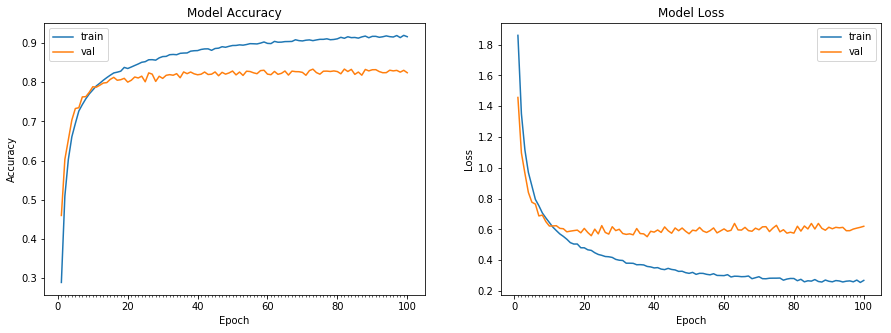

Accuracy on test data is: 82.43


In [0]:
#traning the model
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))


In [0]:
#New Model
model = Sequential()
#(receptive field,Output Channel) calculated using old method
model.add(Convolution2D(50, 3, 3, border_mode='same', activation = 'relu', input_shape=(32, 32, 3)))
#(3,32)
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(100, 3, 3, activation = 'relu'))
#(5,30)
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(200, 3, 3, border_mode='same', activation = 'relu'))
#(7,30)
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2)))
#(14,15)
model.add(Convolution2D(50, 1, 1, activation = 'relu'))
#(14,15)
model.add(Convolution2D(100, 3, 3, activation = 'relu'))
#(16,13)
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(200, 3, 3, border_mode='same', activation = 'relu'))
#(18,13)
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2)))
#(36,6)
model.add(Convolution2D(50, 1, 1, activation = 'relu'))
#(36,6)
model.add(Convolution2D(200, 3, 3, activation = 'relu'))
(38,4)
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(100, 3, 3, border_mode='same', activation = 'relu'))
#(40,4)
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, (3, 3), activation="relu", input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(100, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(200, (3, 3), activation="relu", padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(100, (3, 3), activation="relu")`
/usr/local/lib/py

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 32, 32, 50)        1400      
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 50)        200       
_________________________________________________________________
dropout_20 (Dropout)         (None, 32, 32, 50)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 30, 30, 100)       45100     
_________________________________________________________________
batch_normalization_16 (Batc (None, 30, 30, 100)       400       
_________________________________________________________________
dropout_21 (Dropout)         (None, 30, 30, 100)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 30, 30, 200)       180200    
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`


Epoch 1/100
390/390 [==============================] - 41s 104ms/step - loss: 1.6813 - acc: 0.4271 - val_loss: 1.8458 - val_acc: 0.3854

Epoch 00001: val_acc improved from -inf to 0.38540, saving model to weights-improvement-01-0.39.hdf5
Epoch 2/100
390/390 [==============================] - 37s 95ms/step - loss: 1.1926 - acc: 0.5848 - val_loss: 1.4343 - val_acc: 0.5072

Epoch 00002: val_acc improved from 0.38540 to 0.50720, saving model to weights-improvement-02-0.51.hdf5
Epoch 3/100
390/390 [==============================] - 37s 94ms/step - loss: 0.8972 - acc: 0.6832 - val_loss: 1.2996 - val_acc: 0.5585

Epoch 00003: val_acc improved from 0.50720 to 0.55850, saving model to weights-improvement-03-0.56.hdf5
Epoch 4/100
390/390 [==============================] - 37s 94ms/step - loss: 0.7569 - acc: 0.7345 - val_loss: 1.0099 - val_acc: 0.6511

Epoch 00004: val_acc improved from 0.55850 to 0.65110, saving model to weights-improvement-04-0.65.hdf5
Epoch 5/100
390/390 [=====================

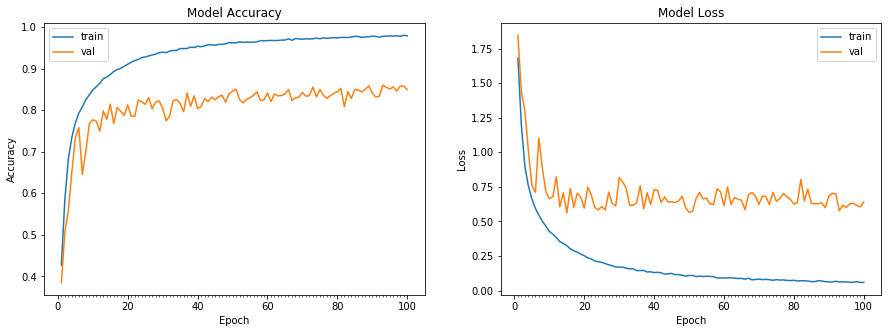

Accuracy on test data is: 84.94


In [0]:
#compiling and training the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 callbacks = [checkpoint],
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Result

Best Accuracy Obtained is 85.98 % in 93th Epoch

Base Accuracy was 82.43%

Base Accuracy was defeated in 26 Epochs.